In [230]:
#now that you have two new regression methods at your fingertips, it's time to give them a spin. 
#In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome 
#and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a 
#lot of variables that could be made into a modelable binary outcome.

#Engineer your features, then create three models. Each model will be run on a training set and a test-set 
#(or multiple test-sets, if you take a folds approach). The models should be:

#Vanilla logistic regression
#Ridge logistic regression
#Lasso logistic regression

In [231]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [232]:
data = pd.read_excel("table_8_offenses_known_to_law_enforcement_illinois_by_city_2013.xls",skiprows=4,na_filter=True)

In [233]:
data.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
count,5.060000e+02,505.000000,506.000000,1.0,504.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.988540e+04,36.988119,1.217391,145.0,3.357143,33.001976,23.279208,494.741107,94.136364,364.017787,36.586957,2.652174
std,1.222651e+05,129.239733,18.446824,NaN,7.383787,525.888768,89.667349,4293.345081,801.450988,2935.187014,562.040900,18.966504
min,1.550000e+02,0.000000,0.000000,145.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.144500e+03,2.000000,0.000000,145.0,0.000000,0.000000,1.000000,28.000000,5.000000,20.250000,0.000000,0.000000
50%,6.895500e+03,10.000000,0.000000,145.0,1.000000,1.000000,6.000000,111.500000,18.000000,79.500000,3.000000,0.000000
75%,1.838700e+04,25.000000,0.000000,145.0,4.000000,5.000000,16.000000,359.500000,52.000000,278.750000,10.000000,1.750000
max,2.720554e+06,2065.000000,414.000000,145.0,71.000000,11815.000000,1507.000000,95908.000000,17775.000000,65497.000000,12636.000000,403.000000


In [234]:
#change the names of the columns within the data frame to remove the / and space.
#this technique can be done when you have a small list of columns, it would be to tiedous to perform on larger 
#data set
data.columns = ['City', 'Population', 'Violent_crime',
       'Murder_and_manslaughter', 'Rape1',
       'Rape2', 'Robbery', 'Aggravated_assault',
       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_vehicle_theft',
       'Arson']

In [235]:
#apply function to drop all NaN values for any row that contains all NaN's. Threshold indicates all rows must have at 
#least five non-na values before it drops the row.
data = data.dropna(axis='rows',thresh=5)

In [236]:
data = data.dropna(axis='columns',thresh=5)

In [237]:
#The total number of null values that remain after dropping null rows and columns
data.isnull().sum()

City                       0
Population                 0
Violent_crime              1
Murder_and_manslaughter    0
Rape2                      2
Robbery                    0
Aggravated_assault         1
Property_crime             0
Burglary                   0
Larceny_theft              0
Motor_vehicle_theft        0
Arson                      0
dtype: int64

In [238]:
#fill the remaining NaN values with median value 
data = data.fillna(data.median(axis=0))

In [239]:
#Test again the total number of null values that remain after removing NaN values from the data rows
data.isnull().sum()

City                       0
Population                 0
Violent_crime              0
Murder_and_manslaughter    0
Rape2                      0
Robbery                    0
Aggravated_assault         0
Property_crime             0
Burglary                   0
Larceny_theft              0
Motor_vehicle_theft        0
Arson                      0
dtype: int64

In [240]:
#populate the predictor/feature variables that can be used to predict y variable of property crime
data_check_test = data[['Population','Violent_crime','Aggravated_assault','Burglary', 'Larceny_theft']]

In [241]:
#show the correlation to determine if the variables are independent.
data_check_test.corr()

,Population,Violent_crime,Aggravated_assault,Burglary,Larceny_theft
Population,1.000000,0.112984,0.107727,0.991484,0.996008
Violent_crime,0.112984,1.000000,0.988571,0.166744,0.121481
Aggravated_assault,0.107727,0.988571,1.000000,0.160978,0.117552
Burglary,0.991484,0.166744,0.160978,1.000000,0.996732
Larceny_theft,0.996008,0.121481,0.117552,0.996732,1.000000


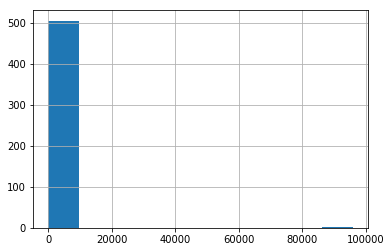

In [242]:
#show the distribution of property crime
data['Property_crime'].hist()

In [243]:
#data.Property_crime[data.Property_crime<20000].hist()

In [244]:
#find the median value of the columns, we will use the median value of the population column to create a new
#outcome/predictor binary variable
data.median()

Population                 6895.5
Violent_crime                10.0
Murder_and_manslaughter       0.0
Rape2                         1.0
Robbery                       1.0
Aggravated_assault            6.0
Property_crime              111.5
Burglary                     18.0
Larceny_theft                79.5
Motor_vehicle_theft           3.0
Arson                         0.0
dtype: float64

In [245]:
#data['Property_crime'].unique()

In [246]:
#data['Property_crime'].astype(int)

In [247]:
#create a new output variable based on property crime row values being greater than or less than the median.
data['Property_Crime_Pred'] = np.where(data['Property_crime'] > data['Property_crime'].median(),1,0)

In [248]:
#check to see if you have two values in the new feature
data['Property_Crime_Pred'].unique()

array([1, 0])

In [249]:
#show the new features
data.head()

,City,Population,Violent_crime,Murder_and_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson,Property_Crime_Pred
0,Addison,37378.0,40.0,1.0,8.0,5.0,26.0,640.0,97.0,527.0,16.0,5.0,1
1,Albany,878.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0
2,Albers,1187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Albion,1975.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,22.0,3.0,1.0,0
4,Algonquin,29980.0,18.0,0.0,3.0,2.0,13.0,519.0,33.0,475.0,11.0,6.0,1


In [250]:
#add new features
data['Crime_per_capita'] = np.where(data['Violent_crime']>0, data['Population'] / data['Violent_crime'],0)

In [251]:
#add new features
data['Murder_per_capita'] = np.where(data['Murder_and_manslaughter']>0, data['Population'] / data['Murder_and_manslaughter'],0)

In [252]:
#add new features
data['Rape_per_capita'] = np.where(data['Rape2']>0, data['Population'] / data['Rape2'],0)

In [253]:
#add new features
data['Robbery_per_capita'] = np.where(data['Robbery']>0, data['Population'] / data['Robbery'],0)

In [254]:
#add new features
data['Assault_per_capita'] = np.where(data['Aggravated_assault']>0, data['Population'] / data['Aggravated_assault'],0)

In [255]:
#add new features
data['Property_crime_per_capita'] = np.where(data['Property_crime']>0, data['Population'] / data['Property_crime'],0)

In [256]:
#add new features
data['Burglary_per_capita'] = np.where(data['Burglary']>0, data['Population'] / data['Burglary'],0)

In [257]:
#add new features
data['Larceny_theft_per_capita'] = np.where(data['Larceny_theft']>0, data['Population'] / data['Larceny_theft'],0)

In [258]:
#add new features
data['Motor_theft_per_capita'] = np.where(data['Motor_vehicle_theft']>0, data['Population'] / data['Motor_vehicle_theft'],0)

In [259]:
#add new features
data['Arson_per_capita'] = np.where(data['Arson']>0, data['Population'] / data['Arson'],0)

In [260]:
#verify the new features
data.head()

,City,Population,Violent_crime,Murder_and_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,...,Crime_per_capita,Murder_per_capita,Rape_per_capita,Robbery_per_capita,Assault_per_capita,Property_crime_per_capita,Burglary_per_capita,Larceny_theft_per_capita,Motor_theft_per_capita,Arson_per_capita
0,Addison,37378.0,40.0,1.0,8.0,5.0,26.0,640.0,97.0,527.0,...,934.450000,37378.0,4672.250000,7475.6,1437.615385,58.403125,385.340206,70.925996,2336.125000,7475.600000
1,Albany,878.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.000000,0.0,0.000000,0.0,0.000000,175.600000,0.000000,175.600000,0.000000,0.000000
2,Albers,1187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Albion,1975.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,22.0,...,0.000000,0.0,0.000000,0.0,0.000000,59.848485,246.875000,89.772727,658.333333,1975.000000
4,Algonquin,29980.0,18.0,0.0,3.0,2.0,13.0,519.0,33.0,475.0,...,1665.555556,0.0,9993.333333,14990.0,2306.153846,57.764933,908.484848,63.115789,2725.454545,4996.666667


In [261]:
#created extra column in error removing the column
#data.drop('Burglary_crime_per_capita', axis=1)

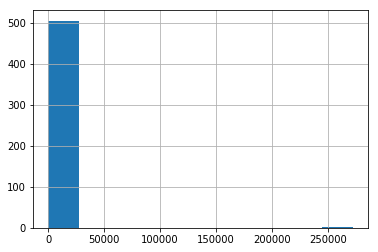

In [262]:
#show a quick histogram to see if the data is skewed one of the new features
data['Crime_per_capita'].hist()

In [263]:
#lets add two new features that will square the data and perform a log funcion to see if we get the data
#to be close to a normal distribution
data['Crime_per_capita_ndist'] = np.square(data['Crime_per_capita'])

In [264]:
data['Crime_per_capita_ndist2'] = np.log1p(data['Crime_per_capita'])

In [265]:
#verify the new columns were added
data.head()

,City,Population,Violent_crime,Murder_and_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,...,Rape_per_capita,Robbery_per_capita,Assault_per_capita,Property_crime_per_capita,Burglary_per_capita,Larceny_theft_per_capita,Motor_theft_per_capita,Arson_per_capita,Crime_per_capita_ndist,Crime_per_capita_ndist2
0,Addison,37378.0,40.0,1.0,8.0,5.0,26.0,640.0,97.0,527.0,...,4672.250000,7475.6,1437.615385,58.403125,385.340206,70.925996,2336.125000,7475.600000,8.731968e+05,6.841028
1,Albany,878.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.000000,0.0,0.000000,175.600000,0.000000,175.600000,0.000000,0.000000,0.000000e+00,0.000000
2,Albers,1187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
3,Albion,1975.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,22.0,...,0.000000,0.0,0.000000,59.848485,246.875000,89.772727,658.333333,1975.000000,0.000000e+00,0.000000
4,Algonquin,29980.0,18.0,0.0,3.0,2.0,13.0,519.0,33.0,475.0,...,9993.333333,14990.0,2306.153846,57.764933,908.484848,63.115789,2725.454545,4996.666667,2.774075e+06,7.418514


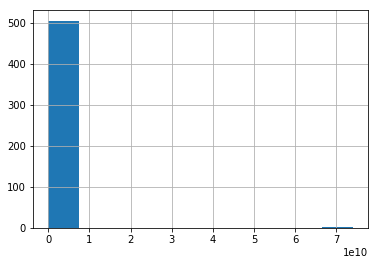

In [266]:
#squaring the data did not normalize 
data['Crime_per_capita_ndist'].hist()

In [267]:
#Drop the crime per capita ndist column as the data is skewed to the left
data = data.drop('Crime_per_capita_ndist',axis=1)

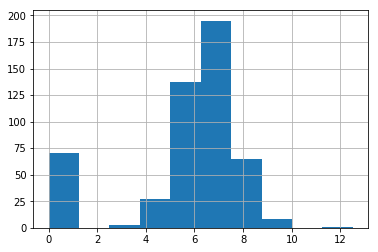

In [268]:
#however, performing a log function on the data did normalize the data a lot more but it is still slight skewed 
#to the right
data['Crime_per_capita_ndist2'].hist()

In [269]:
#verify the crime per capita ndist field was dropped
data.head()

,City,Population,Violent_crime,Murder_and_manslaughter,Rape2,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,...,Murder_per_capita,Rape_per_capita,Robbery_per_capita,Assault_per_capita,Property_crime_per_capita,Burglary_per_capita,Larceny_theft_per_capita,Motor_theft_per_capita,Arson_per_capita,Crime_per_capita_ndist2
0,Addison,37378.0,40.0,1.0,8.0,5.0,26.0,640.0,97.0,527.0,...,37378.0,4672.250000,7475.6,1437.615385,58.403125,385.340206,70.925996,2336.125000,7475.600000,6.841028
1,Albany,878.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.000000,0.0,0.000000,175.600000,0.000000,175.600000,0.000000,0.000000,0.000000
2,Albers,1187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Albion,1975.0,0.0,0.0,0.0,0.0,0.0,33.0,8.0,22.0,...,0.0,0.000000,0.0,0.000000,59.848485,246.875000,89.772727,658.333333,1975.000000,0.000000
4,Algonquin,29980.0,18.0,0.0,3.0,2.0,13.0,519.0,33.0,475.0,...,0.0,9993.333333,14990.0,2306.153846,57.764933,908.484848,63.115789,2725.454545,4996.666667,7.418514


In [282]:
#if the City column still exist then drop it from the dataframe
data = data.drop('City',axis=1)

In [271]:
#next create a training and test set
#set the Y and X variables
#initiate the model
#fit the data of the model
#test the accuracy of the model

In [283]:
#define columns for training set of X all columns
X = data[['Population', 'Violent_crime', 'Murder_and_manslaughter',
       'Rape2', 'Robbery', 'Aggravated_assault','Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft', 'Arson', 'Crime_per_capita',
                'Murder_per_capita', 'Rape_per_capita', 'Robbery_per_capita',
       'Assault_per_capita', 'Property_crime_per_capita','Burglary_per_capita', 'Larceny_theft_per_capita',
       'Motor_theft_per_capita', 'Arson_per_capita', 'Crime_per_capita_ndist2']]

In [273]:
#define columns for training set of X the newly added columns
X = data[['Population', 'Violent_crime', 'Murder_and_manslaughter', 'Crime_per_capita','Murder_per_capita','Murder_per_capita', 
          'Rape_per_capita', 'Robbery_per_capita','Assault_per_capita', 'Property_crime_per_capita','Burglary_per_capita', 'Larceny_theft_per_capita',
       'Motor_theft_per_capita', 'Arson_per_capita', 'Crime_per_capita_ndist2']]

In [274]:
#create column for training set of Y
y = data[['Property_Crime_Pred']]

In [275]:
#show the correlation to determine if the variables are independent.
X.corr()

,Population,Violent_crime,Murder_and_manslaughter,Crime_per_capita,Murder_per_capita,Murder_per_capita,Rape_per_capita,Robbery_per_capita,Assault_per_capita,Property_crime_per_capita,Burglary_per_capita,Larceny_theft_per_capita,Motor_theft_per_capita,Arson_per_capita,Crime_per_capita_ndist2
Population,1.000000,0.112984,0.989012,0.977340,0.112204,0.112204,0.987294,0.017276,0.979579,-0.048735,-0.032704,-0.040407,0.004708,0.098676,0.156638
Violent_crime,0.112984,1.000000,0.056970,-0.024254,0.297562,0.297562,0.030726,-0.049961,-0.020379,-0.115423,-0.136750,-0.099709,-0.050180,0.083862,-0.022196
Murder_and_manslaughter,0.989012,0.056970,1.000000,0.988065,0.038404,0.038404,0.996649,-0.026856,0.988799,-0.030506,-0.038014,-0.026486,-0.029523,0.019683,0.121830
Crime_per_capita,0.977340,-0.024254,0.988065,1.000000,0.009469,0.009469,0.990296,0.015036,0.995281,-0.016134,0.008511,-0.007923,0.013097,0.027707,0.189152
Murder_per_capita,0.112204,0.297562,0.038404,0.009469,1.000000,1.000000,0.031725,0.076950,0.019900,-0.090438,-0.049887,-0.083123,0.049218,0.303634,0.101827
Murder_per_capita,0.112204,0.297562,0.038404,0.009469,1.000000,1.000000,0.031725,0.076950,0.019900,-0.090438,-0.049887,-0.083123,0.049218,0.303634,0.101827
Rape_per_capita,0.987294,0.030726,0.996649,0.990296,0.031725,0.031725,1.000000,-0.011071,0.991320,-0.028545,-0.025476,-0.025529,-0.012668,0.030936,0.135689
Robbery_per_capita,0.017276,-0.049961,-0.026856,0.015036,0.076950,0.076950,-0.011071,1.000000,0.024375,-0.095840,0.141960,-0.083203,0.374090,0.323921,0.330566
Assault_per_capita,0.979579,-0.020379,0.988799,0.995281,0.019900,0.019900,0.991320,0.024375,1.000000,-0.022375,0.000294,-0.019810,0.012797,0.039896,0.176420
Property_crime_per_capita,-0.048735,-0.115423,-0.030506,-0.016134,-0.090438,-0.090438,-0.028545,-0.095840,-0.022375,1.000000,0.268470,0.489600,-0.050760,-0.114919,-0.136789


In [291]:
#import the cross validation train test split functions]

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
y = data['Property_Crime_Pred']
X = data

from sklearn.model_selection import cross_val_score
print('\n Percentage accuracy of each training and testing set')
cv_scores = cross_val_score(lr, X, y, cv=10)

print(cv_scores.mean())

# Fit the model, does it in place
lr.fit(X, y)

#print('\n R2 Percentage accuracy')
print(lr.score(X, y))

pred_y_sklearn = lr.predict(X) #use for just X

print('\n Accuracy by property crime predicition \n')
print(pd.crosstab(pred_y_sklearn, y))

#cv_results= cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)


 Percentage accuracy of each training and testing set
0.9583076923076923
0.9762845849802372

 Accuracy by property crime predicition 

Property_Crime_Pred    0    1
row_0                        
0                    241    0
1                     12  253


In [292]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
y = data['Property_Crime_Pred']
X = data

from sklearn.model_selection import cross_val_score
print('\n Percentage accuracy of X and Y')
cross_val_score(ridgeregr, X, y, cv=10)

ridgeregr.fit(X, y)


print(ridgeregr.score(X, y))
origparams = ridgeregr.coef_[0]
print(origparams)

pred_y_sklearn = ridgeregr.predict(X) #use for just X

print('\n Accuracy by property crime predicition')
print(pd.crosstab(pred_y_sklearn, y))


 Percentage accuracy of each training and testing set
0.9900919644767111
-4.345134830438252e-07

 Accuracy by property crime predicition
Property_Crime_Pred  0  1
row_0                    
-0.069816            1  0
-0.051463            1  0
-0.048916            1  0
-0.044175            1  0
-0.042084            1  0
-0.041231            1  0
-0.038222            1  0
-0.035975            1  0
-0.029978            1  0
-0.027123            1  0
-0.026612            1  0
-0.024441            1  0
-0.023660            1  0
-0.023451            1  0
-0.023334            1  0
-0.023328            1  0
-0.021985            1  0
-0.019195            1  0
-0.017622            1  0
-0.017077            1  0
-0.016136            1  0
-0.015748            1  0
-0.015299            1  0
-0.013128            1  0
-0.012836            1  0
-0.012310            1  0
-0.012175            1  0
-0.011820            1  0
-0.011665            1  0
-0.011553            1  0
...                 .. ..
 1.0

In [305]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

y = data['Property_Crime_Pred']
X = data

alphas = np.logspace(4, 2, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    scores[i] = lasso.score(X, y)
    print(a, lasso.coef_)
    print('\n Accuracy by property crime predicition',scores[i])
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)
print('The lasso cv score:', lassocv_score)

10000.0 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
 -0. -0.  0.  0.  0.]

 Accuracy by property crime predicition 0.0
5994.8425031894085 [ 1.51418953e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

 Accuracy by property crime predicition 0.008630114597738547
3593.813663804626 [ 3.12354367e-07  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]

 A

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
